In [1]:
import sys
import numpy as np
print(sys.version)

import declarative
from phasor.utilities.ipynb.displays import *
from phasor.utilities.ipynb.sympy import *

from phasor import alm

3.5.3 (default, May 10 2017, 15:05:55) 
[GCC 6.3.1 20161221 (Red Hat 6.3.1-1)]
Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>

Sympy version:  1.0


In [2]:
class SympyBeamParam(alm.ComplexBeamParam):
    #have to patch the conversion of everything into Complex types
    @staticmethod
    def complex(val):
        return sympy.re(val) + sympy.I * sympy.im(val)
    
    pi = sympy.pi
    I = sympy.I

In [11]:
z0 = sympy.var('z_0', real = True)
zR = sympy.var('z_R', real = True)
dZ = sympy.var('dZ', real = True)
wlen = sympy.var('lambda', real = True)
q = SympyBeamParam.from_Z_ZR(z0, zR, wavelen=wlen)
q2 = q.propagate_distance(dZ)
olap = q.overlap_with(q2)

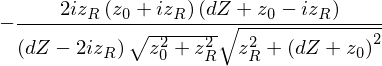

In [12]:
olap.simplify()

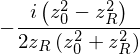

In [13]:
dolap = olap.diff(dZ)
dolap.subs(dZ, 0).simplify()

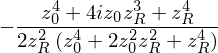

In [14]:
ddolap = olap.diff(dZ).diff(dZ)
ddolap.subs(dZ, 0).simplify()

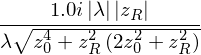

In [15]:
gouy = q2.gouy_phasor / abs(q2.gouy_phasor )
dgouy = gouy.diff(dZ)
dgouy.subs(dZ, 0).simplify()